Name : Kethuri Ajay
UID. : 20BCS6585
Subject : ML Lab
Date of Performance : 24.04.2022

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import os
import numpy as np

In [ ]:
raw_df=pd.read_csv('weatherAUS.csv')

In [ ]:
raw_df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,2014-01-12,CoffsHarbour,17.5,27.2,0.0,6.8,NaN,ENE,30.0,SSE,...,61.0,62.0,1017.1,1016.4,0.0,1.0,25.5,26.5,No,No
10807,2014-01-13,CoffsHarbour,17.3,27.3,0.0,7.8,NaN,SSE,35.0,WSW,...,75.0,64.0,1020.2,1018.9,7.0,5.0,22.5,25.8,No,No
10808,2014-01-14,CoffsHarbour,18.3,27.1,0.0,3.8,12.2,SW,24.0,SSW,...,67.0,55.0,1021.7,1020.8,6.0,1.0,24.8,25.9,No,No
10809,2014-01-15,CoffsHarbour,17.8,28.1,0.0,7.4,12.6,ENE,33.0,SW,...,66.0,62.0,1023.2,1021.6,7.0,2.0,24.6,26.7,No,No


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10811 non-null  object 
 1   Location       10811 non-null  object 
 2   MinTemp        10757 non-null  float64
 3   MaxTemp        10766 non-null  float64
 4   Rainfall       10676 non-null  float64
 5   Evaporation    4357 non-null   float64
 6   Sunshine       2005 non-null   float64
 7   WindGustDir    10624 non-null  object 
 8   WindGustSpeed  10624 non-null  float64
 9   WindDir9am     9786 non-null   object 
 10  WindDir3pm     10657 non-null  object 
 11  WindSpeed9am   10730 non-null  float64
 12  WindSpeed3pm   10734 non-null  float64
 13  Humidity9am    10616 non-null  float64
 14  Humidity3pm    10610 non-null  float64
 15  Pressure9am    10599 non-null  float64
 16  Pressure3pm    10595 non-null  float64
 17  Cloud9am       5655 non-null   float64
 18  Cloud3

In [ ]:
raw_df.dropna(subset=['RainTomorrow'],inplace=True)

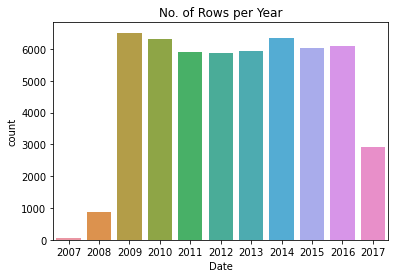

In [ ]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [ ]:
year =pd.to_datetime(raw_df.Date).dt.year

train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [ ]:
print('train_df.shape : ',train_df.shape)
print('val_df.shape : ',val_df.shape)
print('test_df.shape : ',test_df.shape)

train_df.shape :  (37801, 23)
val_df.shape :  (6026, 23)
test_df.shape :  (8990, 23)


In [ ]:
input_cols=list(train_df.columns)[1:-1]
target_col='RainTomorrow'

In [ ]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

In [ ]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

In [ ]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_col].copy()

In [ ]:
 numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
 categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54239,2015-02-14,MountGinini,8.1,14.1,0.0,NaN,NaN,NW,41.0,NNW,...,70.0,98.0,NaN,NaN,NaN,NaN,12.6,12.0,No,Yes
54240,2015-02-15,MountGinini,9.0,17.3,21.4,NaN,NaN,WSW,37.0,WSW,...,98.0,82.0,NaN,NaN,NaN,NaN,12.3,15.1,Yes,No
54241,2015-02-16,MountGinini,10.3,23.7,0.0,NaN,NaN,WNW,28.0,WNW,...,94.0,59.0,NaN,NaN,NaN,NaN,13.8,20.8,No,No
54242,2015-02-17,MountGinini,12.0,22.0,0.4,NaN,NaN,SSW,37.0,NE,...,94.0,63.0,NaN,NaN,NaN,NaN,13.8,19.5,No,Yes


In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp            313
MaxTemp            139
Rainfall           554
Evaporation      19135
Sunshine         22569
WindGustSpeed     4154
WindSpeed9am       979
WindSpeed3pm       976
Humidity9am        760
Humidity3pm        623
Pressure9am       6789
Pressure3pm       6746
Cloud9am         16607
Cloud3pm         16802
Temp9am            641
Temp3pm            541
dtype: int64

In [ ]:
train_inputs[numeric_cols].isna().sum().sort_values(ascending= False)

Sunshine         22569
Evaporation      19135
Cloud3pm         16802
Cloud9am         16607
Pressure9am       6789
Pressure3pm       6746
WindGustSpeed     4154
WindSpeed9am       979
WindSpeed3pm       976
Humidity9am        760
Temp9am            641
Humidity3pm        623
Rainfall           554
Temp3pm            541
MinTemp            313
MaxTemp            139
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer=SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])

In [ ]:
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler().fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])

In [ ]:
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore').fit(raw_df[categorical_cols])

In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
encoded_cols=list(encoder.get_feature_names(categorical_cols))
encoded_cols

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Location_Albury',
 'Location_BadgerysCreek',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Moree',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Penrith',
 'Location_Richmond',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Tuggeranong',
 'Location_WaggaWagga',
 'Location_Williamtown',
 'Location_Wollongong',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindGustDir_nan',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',

In [ ]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])

In [ ]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [ ]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]

In [ ]:
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
X_val = val_inputs[numeric_cols + encoded_cols]

In [ ]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.573298,0.525292,0.001617,0.038093,0.53683,0.289062,0.153846,0.289157,0.701031,0.212121,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.416230,0.568093,0.000000,0.038093,0.53683,0.289062,0.030769,0.265060,0.422680,0.242424,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.560209,0.579767,0.000000,0.038093,0.53683,0.304688,0.146154,0.313253,0.360825,0.292929,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.463351,0.624514,0.000000,0.038093,0.53683,0.132812,0.084615,0.108434,0.432990,0.151515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.680628,0.708171,0.002695,0.038093,0.53683,0.265625,0.053846,0.240964,0.814433,0.323232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54190,0.321990,0.357977,0.000000,0.038093,0.53683,0.218750,0.069231,0.108434,0.979381,0.676768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
54191,0.358639,0.439689,0.000000,0.038093,0.53683,0.179688,0.053846,0.108434,0.701031,0.575758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
54192,0.450262,0.408560,0.009164,0.038093,0.53683,0.382812,0.115385,0.265060,0.979381,0.959596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54193,0.306283,0.361868,0.007008,0.038093,0.53683,0.406250,0.153846,0.228916,0.670103,0.535354,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state = 42)


In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
train_preds= model.predict(X_train)

In [ ]:
pd.value_counts(train_preds)

No     29429
Yes     8372
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_preds, train_targets)

0.9999470913467897

In [ ]:
train_probs= model.predict_proba(X_train)

In [ ]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
model.score(X_val,val_targets)

0.7764686359110521

In [ ]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.773\ngini = 0.345\nsamples = 37801\nvalue = [29427, 8374]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.518\ngini = 0.26\nsamples = 33128\nvalue = [28033, 5095]'),
 Text(0.125, 0.375, 'Cloud3pm <= 0.688\ngini = 0.14\nsamples = 18812\nvalue = [17386, 1426]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Rainfall <= 0.006\ngini = 0.381\nsamples = 14316\nvalue = [10647, 3669]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.843\ngini = 0.419\nsamples = 4673\nvalue = [1394, 3279]'),
 Text(0.625, 0.375, 'Sunshine <= 0.372\ngini = 0.496\nsamples = 1915\nvalue = [873, 1042]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Location_MountGinini <= 0.5\ngini = 0.306\nsamples = 2758\nvalue = [521, 2237]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

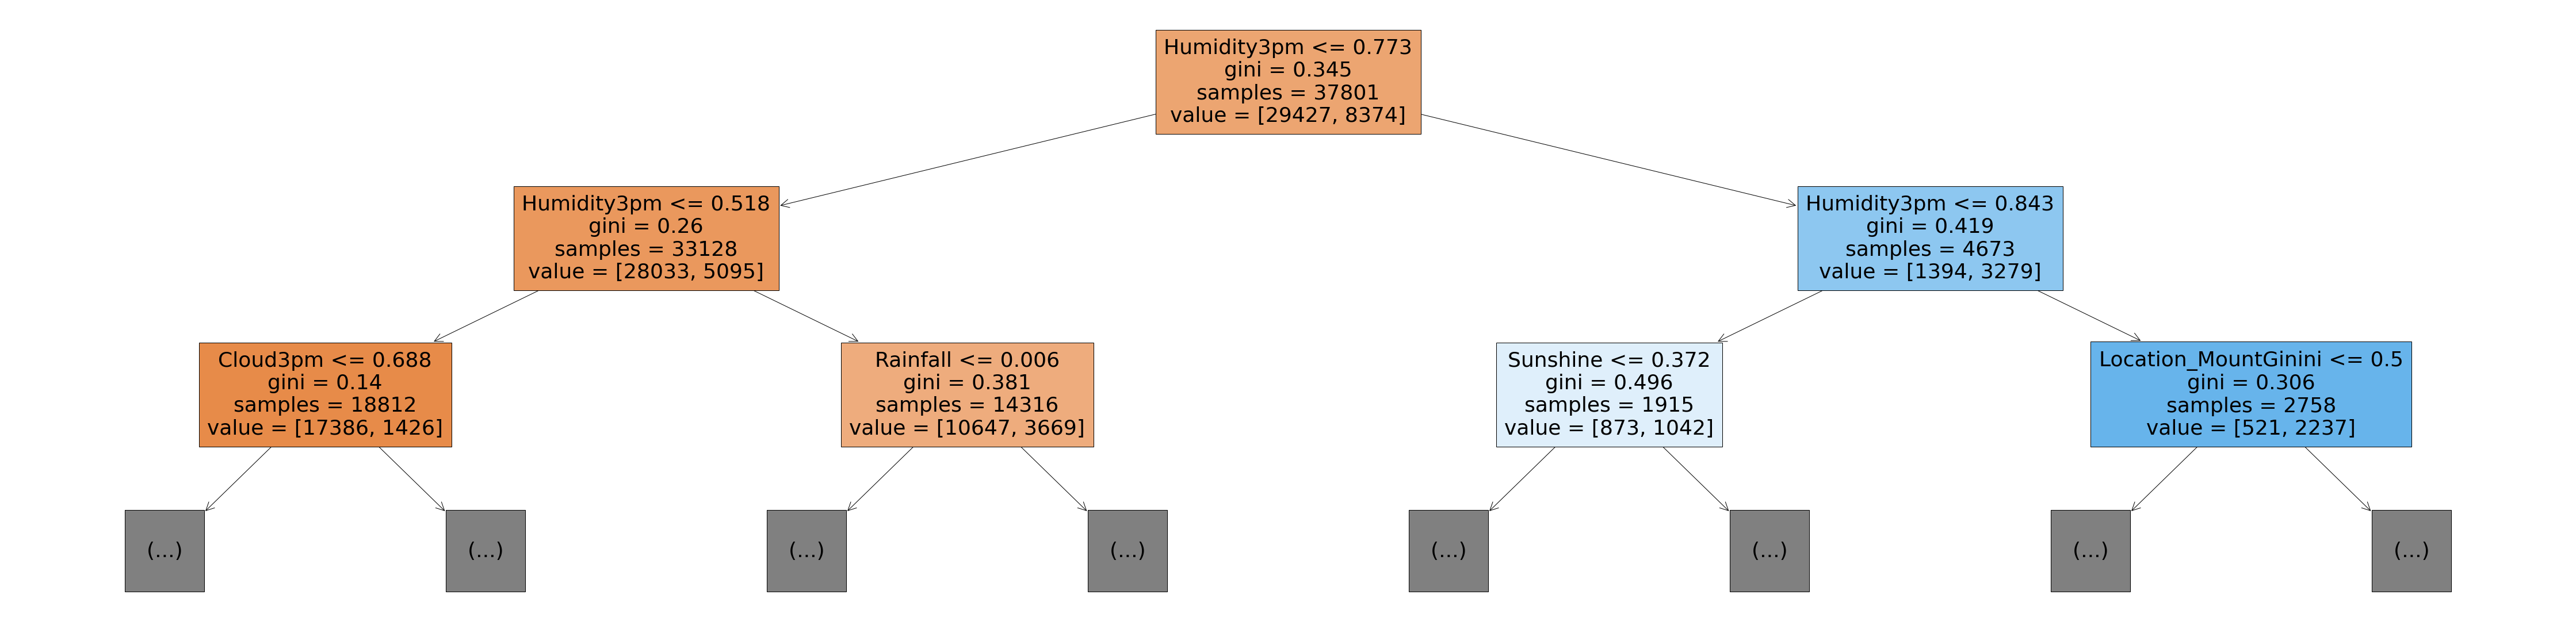

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, max_depth = 2, feature_names= X_train.columns, filled=True)

In [ ]:
model.tree_.max_depth

47

In [ ]:
tree_text = export_text (model,max_depth =10,feature_names=list(X_train.columns))

In [ ]:
print(tree_text[:5000])

|--- Humidity3pm <= 0.77
|   |--- Humidity3pm <= 0.52
|   |   |--- Cloud3pm <= 0.69
|   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |--- Humidity3pm <= 0.44
|   |   |   |   |   |--- Pressure3pm <= 0.55
|   |   |   |   |   |   |--- Humidity9am <= 0.65
|   |   |   |   |   |   |   |--- Sunshine <= 0.49
|   |   |   |   |   |   |   |   |--- Humidity9am <= 0.62
|   |   |   |   |   |   |   |   |   |--- Evaporation <= 0.09
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_ESE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_ESE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- Evaporation >  0.09
|   |   |   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Humidity3pm >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- c

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state = 42)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.score(X_train, train_targets)

0.8306394010740457

In [ ]:
model.score(X_val, val_targets)

0.8172917358114836

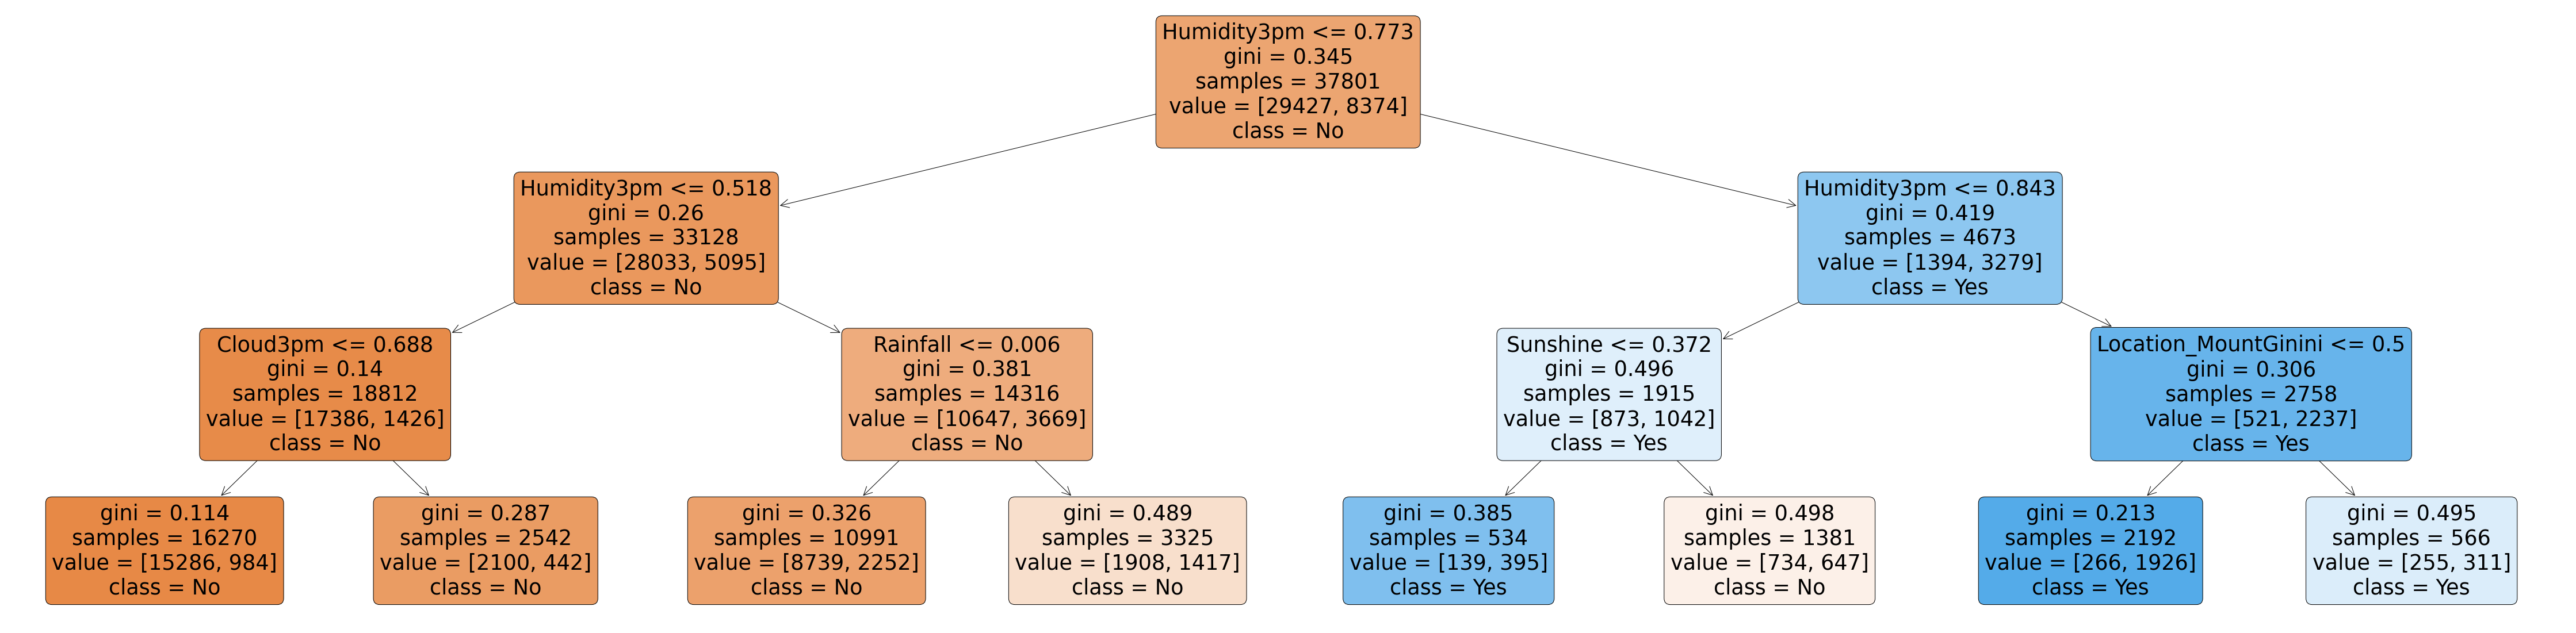

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [ ]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.77
|   |--- Humidity3pm <= 0.52
|   |   |--- Cloud3pm <= 0.69
|   |   |   |--- class: No
|   |   |--- Cloud3pm >  0.69
|   |   |   |--- class: No
|   |--- Humidity3pm >  0.52
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: No
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: No
|--- Humidity3pm >  0.77
|   |--- Humidity3pm <= 0.84
|   |   |--- Sunshine <= 0.37
|   |   |   |--- class: Yes
|   |   |--- Sunshine >  0.37
|   |   |   |--- class: No
|   |--- Humidity3pm >  0.84
|   |   |--- Location_MountGinini <= 0.50
|   |   |   |--- class: Yes
|   |   |--- Location_MountGinini >  0.50
|   |   |   |--- class: Yes

